# Prediction of Annual Turnover of a restaurant

# Importing the libraries

In [43]:
# Importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as ctb
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error

import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

pd.options.display.max_rows = None
pd.options.display.max_columns = 1000

import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [44]:
df = pd.read_csv('Train_dataset.csv', index_col = 0)
df.head()

#index_col = 0 is used to make the first column as Index

,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
Registration Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


# Checking the presence of null values

In [45]:
#checking the dtypes of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 60001 to 63493
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual Turnover                3493 non-null   int64  
 1   Cuisine                        3493 non-null   object 
 2   City                           3493 non-null   object 
 3   Restaurant Location            3493 non-null   object 
 4   Opening Day of Restaurant      3493 non-null   object 
 5   Facebook Popularity Quotient   3394 non-null   float64
 6   Endorsed By                    3493 non-null   object 
 7   Instagram Popularity Quotient  3437 non-null   float64
 8   Fire Audit                     3493 non-null   int64  
 9   Liquor License Obtained        3493 non-null   int64  
 10  Situated in a Multi Complex    3493 non-null   int64  
 11  Dedicated Parking              3493 non-null   int64  
 12  Open Sitting Available         3493 non-nul

In [46]:
#checking the count of null values
df.isnull().sum()

Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs Rating               2483
Value Deals 

In [47]:
#checking the shape of dataframe so that we can match it again after treating the missing values
df.shape

(3493, 33)

In [48]:
#Converting the count of missing values to the percentage of missing values present in each Variable and thus sorting it in decending format
percent = df.isnull().sum()*100/len(df)
percent.sort_values(ascending = False)

Live Sports Rating               94.131119
Value Deals Rating               77.497853
Comedy Gigs Rating               71.085027
Live Music Rating                21.900945
Overall Restaurant Rating         6.069281
Facebook Popularity Quotient      2.834240
Instagram Popularity Quotient     1.603206
Resturant Tier                    1.402806
Ambience                          0.715717
Dedicated Parking                 0.000000
Situated in a Multi Complex       0.000000
Liquor License Obtained           0.000000
Fire Audit                        0.000000
Privacy                           0.000000
Endorsed By                       0.000000
Opening Day of Restaurant         0.000000
Open Sitting Available            0.000000
City                              0.000000
Cuisine                           0.000000
Restaurant Location               0.000000
Restaurant Zomato Rating          0.000000
Restaurant Type                   0.000000
Restaurant Theme                  0.000000
Comfortabli

## As we can see there are 3 variables with missing values percentage more than 50%. Thus treatment is not possible therefore, dropping 3 features i.e. Live Sports Rating, Value Deals Rating, Comedy Gigs Rating.

In [49]:
df = df.drop(columns = ['Live Sports Rating', 'Value Deals Rating', 'Comedy Gigs Rating', 'City'])
df.head()

,Annual Turnover,Cuisine,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy
Registration Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60001,42000000,"indian,irish",Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,8.0,8,6,6,6
60002,50000000,"indian,irish",Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,NaN,5.0,7,7,3,8
60003,32500000,"tibetan,italian",Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,7.0,10,5,2,8
60004,110000000,"turkish,nigerian",Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,7.0,7,4,3,5
60005,20000000,"irish,belgian",Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,NaN,6,2,4,6


In [50]:
#checking whether the missing values are successfully dropped or not
percent = df.isnull().sum()*100/len(df)
percent.sort_values(ascending = False)

Live Music Rating                21.900945
Overall Restaurant Rating         6.069281
Facebook Popularity Quotient      2.834240
Instagram Popularity Quotient     1.603206
Resturant Tier                    1.402806
Ambience                          0.715717
Privacy                           0.000000
Cuisine                           0.000000
Restaurant Location               0.000000
Opening Day of Restaurant         0.000000
Endorsed By                       0.000000
Fire Audit                        0.000000
Liquor License Obtained           0.000000
Situated in a Multi Complex       0.000000
Dedicated Parking                 0.000000
Open Sitting Available            0.000000
Restaurant Theme                  0.000000
Restaurant Type                   0.000000
Comfortablility                   0.000000
Restaurant Zomato Rating          0.000000
Restaurant City Tier              0.000000
Order Wait Time                   0.000000
Staff Responsivness               0.000000
Value for M

### Now for the remaining 5 columns with the missing values we need to identify the stretegy to be used to treat the missing values i.e mean, median, mode.

In [51]:
df['Live Music Rating'].median()

4.0

In [52]:
df['Live Music Rating'].mode()

0    4.0
dtype: float64

In [53]:
df['Overall Restaurant Rating'].median()

9.0

In [54]:
df['Overall Restaurant Rating'].mode()

0    9.0
dtype: float64

In [55]:
df['Facebook Popularity Quotient'].median()

79.0

In [56]:
df['Facebook Popularity Quotient'].mean()

77.93871538008239

In [57]:
df['Instagram Popularity Quotient'].median()

74.05

In [58]:
df['Instagram Popularity Quotient'].mean()

74.40468431771886

In [59]:
df['Resturant Tier'].median()

2.0

In [60]:
df['Resturant Tier'].mean()

1.9265389082462254

In [61]:
df['Ambience'].median()

7.0

In [62]:
df['Ambience'].mean()

6.423010380622838

### After Analysing, the stretegy 'median' is the best way to treat the missing values 

# Taking care of missing values

In [63]:
#Assigning all the column to a single variable
missing = ['Live Music Rating','Overall Restaurant Rating','Facebook Popularity Quotient','Instagram Popularity Quotient','Resturant Tier','Ambience']

In [64]:
#Treating missing values with the help of SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df[missing])
df[missing] = imputer.transform(df[missing])

In [65]:
#checking the treatment is successfull or not
df.isnull().sum()

Annual Turnover                  0
Cuisine                          0
Restaurant Location              0
Opening Day of Restaurant        0
Facebook Popularity Quotient     0
Endorsed By                      0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Resturant Tier                   0
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsivness              0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Live Music Rating                0
Ambience                         0
Lively                           0
Service                          0
Comfortablility                  0
Privacy             

In [66]:
#Checking the shape of data
df.shape

(3493, 29)

# Working with Categorical Data

### Treating the 'Opening Day of Restaurant' column

In [67]:
#Checking the counts
df['Opening Day of Restaurant'].value_counts()

27-12-2009    10
10-07-2010     9
08-12-2010     8
22-12-2009     7
15-10-2010     7
12-09-2010     7
10-07-2009     7
05-12-2009     7
29-04-2010     7
05-06-2010     7
07-10-2009     6
05-02-2009     6
20-01-2010     6
27-05-2009     6
03-08-2009     6
23-02-2011     6
27-07-2009     6
28-03-2010     6
23-02-2010     6
30-06-2010     6
12-05-2010     6
29-05-2010     6
26-07-2010     6
06-10-2009     6
15-09-2010     6
27-06-2011     6
14-03-2011     6
31-07-2009     6
30-06-2009     6
08-01-2011     6
30-05-2010     5
24-07-2009     5
01-05-2010     5
20-01-2011     5
25-08-2011     5
20-03-2010     5
04-02-2010     5
02-07-2011     5
29-05-2011     5
28-06-2010     5
06-03-2010     5
01-07-2011     5
30-10-2009     5
02-10-2009     5
01-06-2011     5
21-03-2010     5
10-02-2010     5
29-04-2011     5
21-07-2010     5
02-01-2011     5
13-12-2011     5
21-01-2009     5
19-06-2011     5
26-09-2009     5
06-08-2011     5
15-12-2009     5
31-12-2010     5
11-06-2009     5
11-07-2009    

In [68]:
#Calculating the age of restaurant
import pandas as pd
from datetime import datetime
from datetime import date


def calculate_age(Opening_day):
    Opening_day = datetime.strptime(Opening_day, "%d-%m-%Y").date()
    today = date.today()
    return today.year - Opening_day.year - ((today.month, today.day) < (Opening_day.month, Opening_day.day))

#Creating a new feature as 'Years_open'

df['Years_open'] = df['Opening Day of Restaurant'].apply(calculate_age)
print(df['Years_open'])

Registration Number
60001    12
60002    12
60003     9
60004    12
60005    11
60006     9
60007     9
60008     9
60009    10
60010     8
60011    12
60012    12
60013    11
60014    11
60015     9
60016    12
60017     9
60018    14
60019     9
60020    11
60021    13
60022    10
60023    10
60024    15
60025     8
60026    11
60027    14
60028     9
60029     8
60030     9
60031    12
60032     9
60033    10
60034    10
60035    12
60036    11
60037     9
60038     9
60039    10
60040    11
60041    13
60042    10
60043    10
60044     8
60045    13
60046     9
60047    10
60048    10
60049    11
60050    13
60051    14
60052    10
60053    10
60054    10
60055    10
60056    10
60057    12
60058    12
60059    12
60060    24
60061    10
60062     8
60063    11
60064    10
60065    15
60066    11
60067    12
60068    10
60069    13
60070     9
60071     9
60072    11
60073     9
60074     9
60075    10
60076     9
60077    11
60078    10
60079     9
60080    10
60081     9
60082   

In [69]:
#checking unique values
df['Years_open'].unique()

array([12,  9, 11, 10,  8, 14, 13, 15, 24, 16,  7,  4, 18, 19, 17, 21, 20],
      dtype=int64)

In [70]:
#checking the shape of data
df.shape

(3493, 30)

In [71]:
#Dropping the 'Opening Day of Restaurant' column as it has no use
df = df.drop('Opening Day of Restaurant',axis='columns')

In [72]:
#Checking the shape again
df.shape

(3493, 29)

### Finally we have treated the 'Opening Day of Restaurant' column

### Now Treating the 'Restaurant Theme' column

In [73]:
#Grouping all the themes under 5% in 'other' section
z =df['Restaurant Theme'].value_counts()/len(df)*100
y = z[z.apply(lambda x:x<6)]
df['Restaurant Theme'] = df['Restaurant Theme'].apply(lambda x :'other' if x in y else x)
df['Restaurant Theme']

Registration Number
60001    Arabian
60002      Greek
60003       90's
60004    Arabian
60005      Greek
60006      Greek
60007    Arabian
60008      other
60009      Greek
60010      Greek
60011    Arabian
60012       90's
60013      other
60014      Greek
60015      other
60016       90's
60017      Greek
60018    Arabian
60019    Arabian
60020    Arabian
60021    Arabian
60022       90's
60023      Greek
60024      Greek
60025    Arabian
60026    Arabian
60027    Arabian
60028      Greek
60029      Greek
60030       90's
60031    Arabian
60032    Arabian
60033    Arabian
60034       90's
60035    Arabian
60036      Greek
60037    Arabian
60038      Greek
60039    Arabian
60040      Greek
60041      other
60042    Arabian
60043       90's
60044      Greek
60045    Arabian
60046      other
60047    Arabian
60048    Arabian
60049    Arabian
60050       90's
60051    Arabian
60052      Greek
60053    Arabian
60054      other
60055    Arabian
60056    Arabian
60057      Greek
60058      

In [74]:
#Checking the value count
df['Restaurant Theme'].value_counts()

Arabian    1373
Greek      1030
90's        584
other       506
Name: Restaurant Theme, dtype: int64

In [75]:
#Checking the uniqueness of the data
df['Restaurant Theme'].unique()

array(['Arabian', 'Greek', "90's", 'other'], dtype=object)

### Finally we have treated the 'Restaurant Theme' column

### Below columns need no treatment

In [76]:
df['Restaurant Location'].value_counts()

Near Party Hub       2658
Near Business Hub     835
Name: Restaurant Location, dtype: int64

In [77]:
df['Endorsed By'].value_counts()

Not Specific        1961
Tier A Celebrity    1500
Local Celebrity       32
Name: Endorsed By, dtype: int64

In [78]:
df['Restaurant Type'].value_counts()

Bar                         3235
Caffee                       212
Gastro Bar                    45
Buffet/Family Restaurant       1
Name: Restaurant Type, dtype: int64

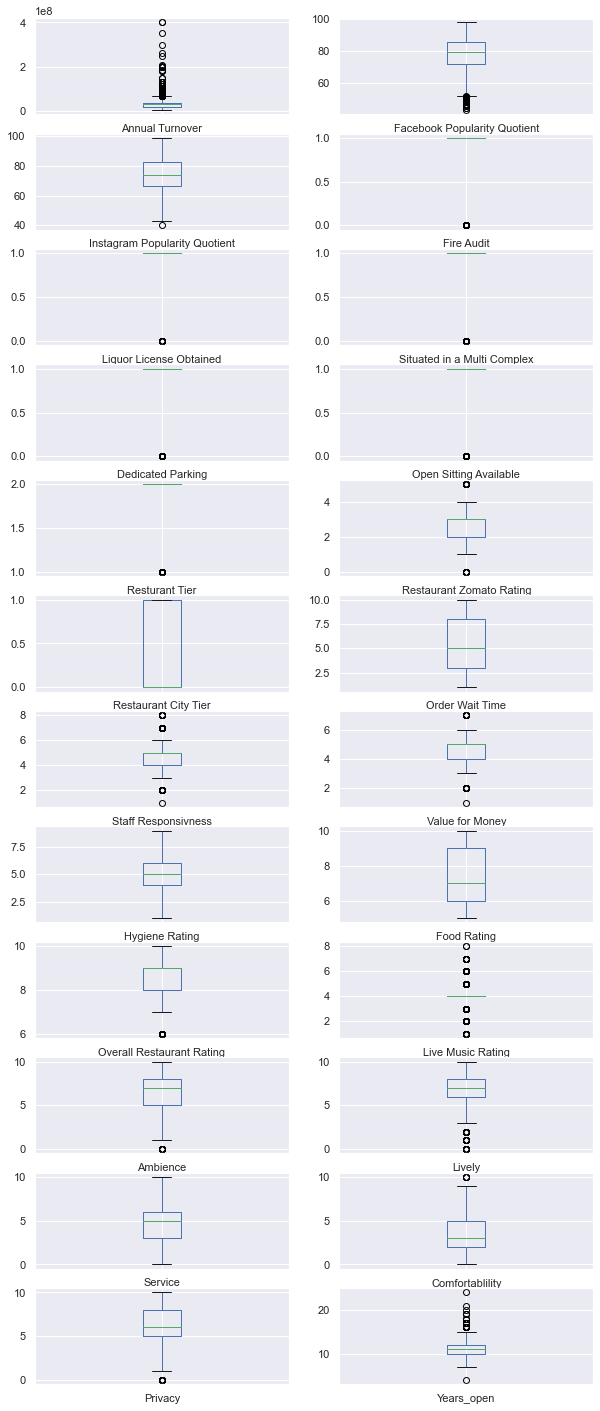

In [79]:
df.plot(kind='box', subplots=True,figsize=(10, 40),layout=(19,2),  sharex=False, sharey=False)
plt.show()

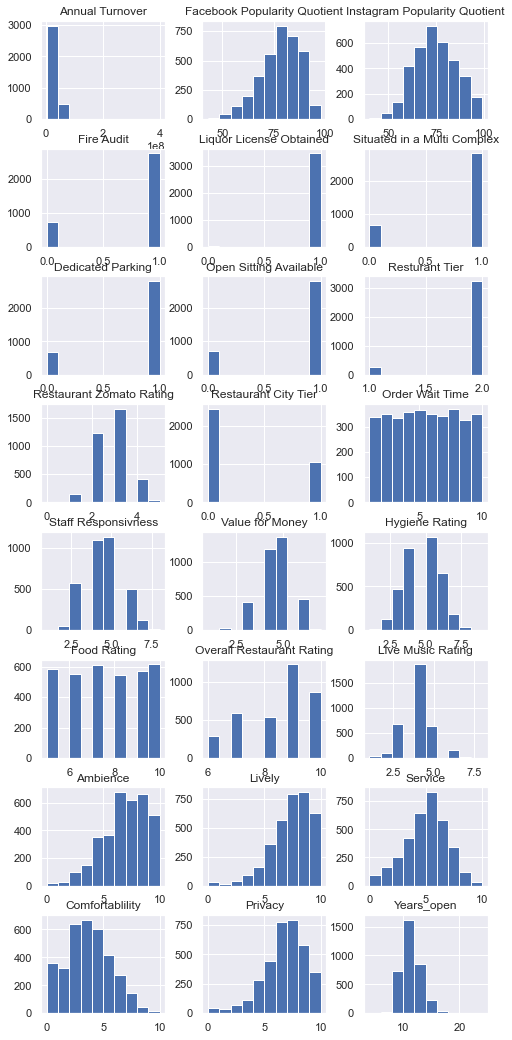

In [80]:
cat_df = df.select_dtypes(include=np.number)
cat_df.hist(layout = (13,3), figsize=(8, 30))
plt.show()

# Splitting the data

In [81]:
#Splitting the Dependent and Independent Variables
X = df.iloc[0:,1:]
y = df.loc[0:,['Annual Turnover']]

In [82]:
X.head()
X.shape

(3493, 28)

In [83]:
y.head()

,Annual Turnover
Registration Number,
60001,42000000
60002,50000000
60003,32500000
60004,110000000
60005,20000000


# Encoding categorical data

### Encoding the independant variable¶

In [84]:
X_cat = X.select_dtypes(exclude = np.number)
X_cat.head()
X_cat.shape

(3493, 5)

In [85]:
X_cat.shape

(3493, 5)

In [86]:
X_dum = pd.get_dummies(X_cat)
X_dum.head()

,"Cuisine_algerian,algerian","Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai","Cuisine_nigerian,cajun","Cuisine_peruvian,cuban","Cuisine_polish,jewish","Cuisine_swedish,greek","Cuisine_tibetan,greek","Cuisine_tibetan,italian","Cuisine_turkish,nigerian","Cuisine_turkish,sapnish","Cuisine_welsh,thai",Restaurant Location_Near Business Hub,Restaurant Location_Near Party Hub,Endorsed By_Local Celebrity,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity,Restaurant Type_Bar,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar,Restaurant Theme_90's,Restaurant Theme_Arabian,Restaurant Theme_Greek,Restaurant Theme_other
Registration Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60001,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
60002,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0
60003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0
60004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
60005,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0


In [87]:
X_dum.shape

(3493, 33)

In [88]:
X_num = X.select_dtypes(include = np.number)
X_num.head()
X_num.shape

(3493, 23)

In [89]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

col_names = ['Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier', 'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy', 'Years_open']

features = X[col_names]

ct = ColumnTransformer([('somename', StandardScaler(), ['Facebook Popularity Quotient', 'Instagram Popularity Quotient'])], remainder='passthrough')

X_new = ct.fit_transform(features)

In [90]:
X_new = pd.DataFrame(X_new, columns = ['Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier', 'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy', 'Years_open'])
X_new.shape
#X_new.head()

(3493, 23)

In [91]:
X_new.reset_index(drop=True, inplace=True)
X_dum.reset_index(drop=True, inplace=True)
X = pd.concat([X_new, X_dum], axis=1)
X.head()
X.shape

(3493, 56)

In [92]:
X.columns

Index(['Facebook Popularity Quotient', 'Instagram Popularity Quotient',
       'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time',
       'Staff Responsivness', 'Value for Money', 'Hygiene Rating',
       'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating',
       'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy',
       'Years_open', 'Cuisine_algerian,algerian', 'Cuisine_algerian,belgian',
       'Cuisine_algerian,korean', 'Cuisine_british,belgian',
       'Cuisine_british,japanese', 'Cuisine_chinese,salvadorian',
       'Cuisine_cuban,british', 'Cuisine_hawaiian,latvian',
       'Cuisine_indian,irish', 'Cuisine_irish,belgian',
       'Cuisine_japanese,thai', 'Cuisine_nigerian,cajun',
       'Cuisine_peruvian,cuban', 'Cuisine_polish,jewish',
       'Cuisine_swedish,greek', 'Cuisine_tibetan,gree

### Splitting the dataset into the Training set and Test set

In [93]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


regression_models = {"Ridge": Ridge(),
                     "SVR_linear": SVR(kernel="linear"),
                     "SVR_rbf": SVR(kernel="rbf"),
                     "RandomForestRegressor": RandomForestRegressor()}

regression_results = {}

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Check the shapes of the training and test datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2794, 56), (699, 56), (2794, 1), (699, 1))

In [94]:
# Evaluation Function

def rmse(y_test, y_preds):
    return np.sqrt(mean_squared_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Validating MAE": mean_absolute_error(y_test, val_preds),
              "Training RMSE": rmse(y_train, train_preds),
              "Validating RMSE": rmse(y_test, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Validating R^2": model.score(X_test, y_test)}
    return scores

In [95]:
#from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Loop through the items in the regression_models dictionary
for model_name, model in regression_models.items():
    
    # Create a model pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[("model", model)])
    
    # Fit the model pipeline to the car sales training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(X_train, y_train)
    
    # Score the model pipeline on the test data appending the model_name to the 
    # results dictionary
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(X_test, y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


In [96]:
regression_results

{'Ridge': 0.16685551639652452,
 'SVR_linear': -0.0011588481711413134,
 'SVR_rbf': -0.00127788016228636,
 'RandomForestRegressor': 0.09261643755160998}

In [97]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(100, 1200, 50),
           "max_depth": [None, 3, 5, 10, 20, 30],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=10,
                              cv=5,
                              verbose=2)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=19, max_features=auto, max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=19, max_features=auto, max_depth=None, total=   0.7s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=19, max_features=auto, max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=19, max_features=auto, max_depth=None, total=   0.7s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=19, max_features=auto, max_depth=None 
[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=19, max_features=auto, max_depth=None, total=   0.7s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=19, max_features=auto, max_depth=None 
[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=19, max_features=auto, max_depth=None, total=   0.7s
[CV] n_estimators=100, min_samples_split=12, min_samples_leaf=19, max_features=auto, max_depth=None 
[CV]  n_estimators=100, min_samples_split=12, min_samples_leaf=19, max_features=auto, max_depth=None, total=   0.7s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=500, m

[CV]  n_estimators=950, min_samples_split=4, min_samples_leaf=9, max_features=0.5, max_depth=None, total=   4.3s
[CV] n_estimators=950, min_samples_split=4, min_samples_leaf=9, max_features=0.5, max_depth=None 
[CV]  n_estimators=950, min_samples_split=4, min_samples_leaf=9, max_features=0.5, max_depth=None, total=   4.3s
[CV] n_estimators=950, min_samples_split=4, min_samples_leaf=9, max_features=0.5, max_depth=None 
[CV]  n_estimators=950, min_samples_split=4, min_samples_leaf=9, max_features=0.5, max_depth=None, total=   4.4s
[CV] n_estimators=950, min_samples_split=4, min_samples_leaf=9, max_features=0.5, max_depth=None 
[CV]  n_estimators=950, min_samples_split=4, min_samples_leaf=9, max_features=0.5, max_depth=None, total=   4.3s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=17, max_features=1, max_depth=3 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=17, max_features=1, max_depth=3, total=   0.3s
[CV] n_estimators=300, min_samples_split=6, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Wall time: 1min 20s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  800,  850,  900,  950, 1000, 1050, 1100, 1150])},
                   verbose=2)

In [98]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 950,
 'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_features': 0.5,
 'max_depth': None}

In [99]:
show_scores(rs_model)

{'Training MAE': 8962848.256860811,
 'Validating MAE': 10422323.08098718,
 'Training RMSE': 17931580.48351219,
 'Validating RMSE': 19413880.709685564,
 'Training R^2': 0.3189664019951407,
 'Validating R^2': 0.17104857421177877}

In [100]:
%%time
#Run on best hyperparameter


# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=750,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    max_features='sqrt',
                                    n_jobs=1,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 3.21 s


RandomForestRegressor(max_features='sqrt', n_estimators=750, n_jobs=1,
                      random_state=42)

In [101]:
show_scores(ideal_model)

{'Training MAE': 4051304.143800207,
 'Validating MAE': 10528605.945000794,
 'Training RMSE': 7594537.0693235975,
 'Validating RMSE': 19454893.21902657,
 'Training R^2': 0.877838597316314,
 'Validating R^2': 0.16754249637665874}

In [104]:
y_preds = ideal_model.predict(X_test)
#y_preds = y_preds.astype(int)
df = pd.DataFrame({'Predicted Turnover':y_preds.astype(int)})
df.head()

,Predicted Turnover
0,25209333
1,34795333
2,26102666
3,21705333
4,27034000


In [64]:
df2 = pd.DataFrame(y_test)
df2

,Annual Turnover
Registration Number,
61946,22000000
63363,22000000
62650,43000000
61881,20000000
62769,20000000
60786,30000000
63307,27500000
61284,30000000
60679,20000000


In [65]:
df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
data = pd.concat([df2, df], axis=1)
data

,Annual Turnover,Predicted Turnover
0,22000000,25551333
1,22000000,33778000
2,43000000,25257333
3,20000000,21734666
4,20000000,27884666
5,30000000,26370000
6,27500000,32304666
7,30000000,30214666
8,20000000,25693333
9,24000000,34467333


In [66]:
ideal_model.score(X_train, y_train)

0.8783145423230632

In [67]:
#Mean Square Error
MSE = np.sqrt(mean_squared_error(y_test, y_preds))
MSE

19452909.79464882

## Boosting Techniques

# Test

In [109]:
df = pd.read_csv('Test_dataset.csv',index_col=0)
df.head()

,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
Registration Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20001,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,1,1,0,2,Bar,Greek,3,0,10,5,3,5,8,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
20002,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,1,1,1,2,Bar,Nature,4,0,10,4,5,6,8,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
20003,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,1,0,1,2,Bar,Greek,2,0,6,5,5,6,9,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
20004,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,1,1,1,2,Gastro Bar,90's,3,0,10,5,5,5,9,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
20005,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,1,0,0,1,Bar,Mise En,4,1,7,5,5,7,8,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [ ]:
#Converting the count of missing values to the percentage of missing values present in each Variable and thus sorting it in decending format
percent = df.isnull().sum()*100/len(df)
percent.sort_values(ascending = False)

In [ ]:
df = df.drop(columns = ['Live Sports Rating', 'Value Deals Rating', 'Comedy Gigs Rating', 'City'])
df.head()

In [ ]:
#Assigning all the column to a single variable
missing = ['Live Music Rating','Overall Restaurant Rating','Facebook Popularity Quotient','Instagram Popularity Quotient','Resturant Tier','Ambience']

In [ ]:
#Treating missing values with the help of SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df[missing])
df[missing] = imputer.transform(df[missing])

In [ ]:
#checking the treatment is successfull or not
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
#Checking the counts
df['Opening Day of Restaurant'].value_counts()

In [ ]:
#Calculating the age of restaurant
import pandas as pd
from datetime import datetime
from datetime import date


def calculate_age(Opening_day):
    Opening_day = datetime.strptime(Opening_day, "%d-%m-%Y").date()
    today = date.today()
    return today.year - Opening_day.year - ((today.month, today.day) < (Opening_day.month, Opening_day.day))

#Creating a new feature as 'Years_open'

df['Years_open'] = df['Opening Day of Restaurant'].apply(calculate_age)
print(df['Years_open'])

In [ ]:
#checking unique values
df['Years_open'].unique()

In [ ]:
#checking the shape of data
df.shape

In [ ]:
#Dropping the 'Opening Day of Restaurant' column as it has no use
df = df.drop('Opening Day of Restaurant',axis='columns')

In [ ]:
#Checking the shape again
df.shape

In [ ]:
#Grouping all the themes under 5% in 'other' section
z =df['Restaurant Theme'].value_counts()/len(df)*100
y = z[z.apply(lambda x:x<5)]
df['Restaurant Theme'] = df['Restaurant Theme'].apply(lambda x :'other' if x in y else x)
df['Restaurant Theme']

In [ ]:
#Checking the value count
df['Restaurant Theme'].value_counts()

In [ ]:
#Checking the uniqueness of the data
df['Restaurant Theme'].unique()

In [ ]:
df.shape

In [ ]:
df

In [ ]:
X_cat = df.select_dtypes(exclude = np.number)
X_cat.head()
X_cat.shape

In [ ]:
X_dum = pd.get_dummies(X_cat)
X_dum.head()
X_dum.shape

In [ ]:
X_dum.shape

In [ ]:
X_num = df.select_dtypes(include = np.number)
X_num.head()
X_num.shape

In [ ]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

col_names = ['Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier', 'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy', 'Years_open']

features = df[col_names]

ct = ColumnTransformer([('somename', StandardScaler(), ['Facebook Popularity Quotient', 'Instagram Popularity Quotient'])], remainder='passthrough')

X_new = ct.fit_transform(features)

In [ ]:
X_new = pd.DataFrame(X_new, columns = ['Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex', 'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier', 'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy', 'Years_open'])
X_new.shape

In [ ]:
X_new.reset_index(drop=True, inplace=True)
X_dum.reset_index(drop=True, inplace=True)
X = pd.concat([X_new, X_dum], axis=1)
X.head()

In [ ]:
X.shape

In [ ]:
X.columns

In [ ]:
test = pd.DataFrame(ideal_model.predict(X)).apply(lambda x: '%.5f' % x, axis=1)

In [ ]:
test = pd.DataFrame(test)
test = test.rename(columns = {0: 'Annual Turnover'}, inplace = False)
test

In [ ]:
df = pd.read_csv('Sample_Solution.csv')
df = df.drop('Annual Turnover',axis='columns')
df
#test1 = df[['Registration Number']]
#test1.drop(test1[test1['Registration Number'] > 20426].index, inplace=True)

In [ ]:
final = pd.concat([df,test], axis=1)
final = final.dropna()

In [ ]:
final